<a href="https://colab.research.google.com/github/yeseul98/yeseul/blob/master/AS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Dropout
from keras.layers import Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir = '../content/drive/MyDrive/DEEPNOID/lower_class/'

In [5]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 16
image_size=(224, 224)

In [6]:
train_data = data_generator.flow_from_directory(
    directory = data_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)
valid_data = data_generator.flow_from_directory(
    data_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
)

Found 302 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [7]:
model = Sequential()

#conv1
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3), trainable =False))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))


#conv2
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#conv3
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#conv4
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#conv5
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=1, padding='same', activation='relu', trainable =False))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#Flatten
model.add(Flatten())

# FC 6,7,8
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       5

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(generator = train_data, steps_per_epoch = 15, validation_data = valid_data, validation_steps = 3, epochs =50 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
15/15 [==============================] - 102s 7s/step - loss: 0.8110 - accuracy: 0.8361 - val_loss: 0.5064 - val_accuracy: 0.8958
Epoch 2/50
15/15 [==============================] - 100s 7s/step - loss: 0.6558 - accuracy: 0.8403 - val_loss: 0.5773 - val_accuracy: 0.8542
Epoch 3/50
15/15 [==============================] - 102s 7s/step - loss: 0.5780 - accuracy: 0.8583 - val_loss: 0.3284 - val_accuracy: 0.9375
Epoch 4/50
15/15 [==============================] - 102s 7s/step - loss: 0.5878 - accuracy: 0.8529 - val_loss: 0.5722 - val_accuracy: 0.8542
Epoch 5/50
15/15 [==============================] - 99s 7s/step - loss: 0.6325 - accuracy: 0.8361 - val_loss: 0.5095 - val_accuracy: 0.8750
Epoch 6/50
15/15 [==============================] - 101s 7s/step - loss: 0.6234 - accuracy: 0.8361 - val_loss: 0.6933 - val_accuracy: 0.8125
Epoch 7/50
15/15 [==============================] - 100s 7s/step - loss: 0.5920

No handles with labels found to put in legend.


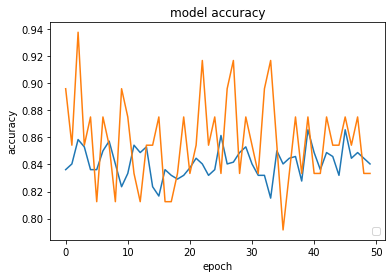

No handles with labels found to put in legend.


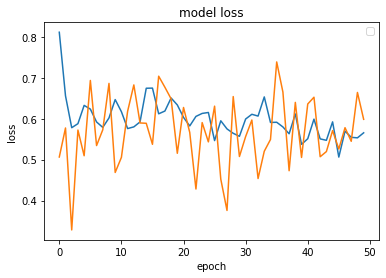

In [9]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

predicted_label: 0 
 score: 0.47536692


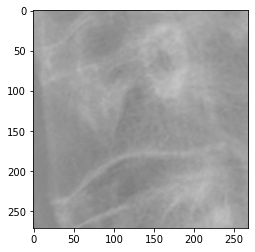

In [10]:
import tensorflow as tf
import numpy as np
test_path = '../content/drive/MyDrive/DEEPNOID/test/PatientID1072_C4L_3.png'
img = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(224, 224)
)

image=plt.imread(test_path)
plt.imshow(image)


image=plt.imread(test_path)
plt.imshow(image)

test_array = tf.keras.preprocessing.image.img_to_array(img)
test_array = tf.expand_dims(test_array, 0) # Create a batch

predictions = model.predict(test_array)
score = tf.nn.softmax(predictions[0])

print('predicted_label:',np.argmax(score),'\n','score:', np.max(score))